## Introduction
Twitter bot detection is crucial for:
- Preventing misinformation spread
- Protecting real users from spam
- Maintaining platform integrity

## Define the problem

## Find a dataset

dataset: https://www.kaggle.com/datasets/goyaladi/twitter-bot-detection-dataset?select=bot_detection_data.csv

In [1]:
%pip install kagglehub pandas numpy matplotlib seaborn scikit-learn textblob


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: /Users/0xdev/.pyenv/versions/3.12.2/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

### Citation
Dataset: [Twitter Bot Detection Dataset](https://www.kaggle.com/datasets/goyaladi/twitter-bot-detection-dataset)  
Author: Goyal Aditya  
Platform: Kaggle  
Accessed: 2025-01-19

Ensure kaggle.json is in the location ~/.kaggle/kaggle.json to use the API.

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("goyaladi/twitter-bot-detection-dataset")

print("Path to dataset files:", path)

/Users/0xdev/.pyenv/versions/3.12.2/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/0xdev/.cache/kagglehub/datasets/goyaladi/twitter-bot-detection-dataset/versions/2


In [4]:
df = pd.read_csv(f'{path}/bot_detection_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User ID         50000 non-null  int64 
 1   Username        50000 non-null  object
 2   Tweet           50000 non-null  object
 3   Retweet Count   50000 non-null  int64 
 4   Mention Count   50000 non-null  int64 
 5   Follower Count  50000 non-null  int64 
 6   Verified        50000 non-null  bool  
 7   Bot Label       50000 non-null  int64 
 8   Location        50000 non-null  object
 9   Created At      50000 non-null  object
 10  Hashtags        41659 non-null  object
dtypes: bool(1), int64(5), object(5)
memory usage: 3.9+ MB


In [6]:
df.describe()

,User ID,Retweet Count,Mention Count,Follower Count,Bot Label
count,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,548890.680540,50.00560,2.513760,4988.602380,0.500360
std,259756.681425,29.18116,1.708563,2878.742898,0.500005
min,100025.000000,0.00000,0.000000,0.000000,0.000000
25%,323524.250000,25.00000,1.000000,2487.750000,0.000000
50%,548147.000000,50.00000,3.000000,4991.500000,1.000000
75%,772983.000000,75.00000,4.000000,7471.000000,1.000000
max,999995.000000,100.00000,5.000000,10000.000000,1.000000


In [7]:
df.head()

,User ID,Username,Tweet,Retweet Count,Mention Count,Follower Count,Verified,Bot Label,Location,Created At,Hashtags
0,132131,flong,Station activity person against natural majori...,85,1,2353,False,1,Adkinston,2020-05-11 15:29:50,NaN
1,289683,hinesstephanie,Authority research natural life material staff...,55,5,9617,True,0,Sanderston,2022-11-26 05:18:10,both live
2,779715,roberttran,Manage whose quickly especially foot none to g...,6,2,4363,True,0,Harrisonfurt,2022-08-08 03:16:54,phone ahead
3,696168,pmason,Just cover eight opportunity strong policy which.,54,5,2242,True,1,Martinezberg,2021-08-14 22:27:05,ever quickly new I
4,704441,noah87,Animal sign six data good or.,26,3,8438,False,1,Camachoville,2020-04-13 21:24:21,foreign mention


In [8]:
import string
from textblob import TextBlob
import re

df.columns = [col.lower().replace(" ", "_") for col in df.columns]
df['location'] = df['location'].fillna('none').str.lower()
df['hashtags'] = df['hashtags'].fillna('none')
df['bot_label'] = df['bot_label'].astype(int)

df['created_at'] = pd.to_datetime(df['created_at'])
df['created_at_date'] = df['created_at'].dt.date
df['created_at_year'] = df['created_at'].dt.year
df['created_at_month'] = df['created_at'].dt.month
df['created_at_hour'] = df['created_at'].dt.hour
df['created_at_dayofweek'] = df['created_at'].dt.dayofweek
df['created_at_is_weekend'] = df['created_at_dayofweek'].isin([5, 6]).astype(int)
df['account_age_days'] = (pd.Timestamp.now() - df['created_at']).dt.days

df['username_length'] = df['username'].apply(len)
df['username_digit_count'] = df['username'].apply(lambda x: sum(c.isdigit() for c in x))
df['username_letter_count'] = df['username'].apply(lambda x: sum(c.isalpha() for c in x))
df['username_special_char_count'] = df['username'].apply(lambda x: sum(c in string.punctuation for c in x))
df['username_digit_ratio'] = df['username_digit_count'] / df['username_length'] * 100
df['username_has_bot_pattern'] = df['username'].str.contains(r'bot|b0t|robot|_bot_', case=False).astype(int)
df['username_has_repeating_chars'] = df['username'].apply(lambda x: bool(re.search(r'(.)\1{2,}', x))).astype(int)

df['tweet_length'] = df['tweet'].apply(len)
df['tweet_digit_count'] = df['tweet'].apply(lambda x: sum(c.isdigit() for c in x))
df['tweet_letter_count'] = df['tweet'].apply(lambda x: sum(c.isalpha() for c in x))
df['tweet_punctuation_count'] = df['tweet'].apply(lambda x: sum(c in string.punctuation for c in x))
df['tweet_digit_ratio'] = df['tweet_digit_count'] / df['tweet_length'] * 100
df['tweet_word_count'] = df['tweet'].apply(lambda x: len(x.split()))
df['avg_word_length'] = df['tweet_length'] / df['tweet_word_count']
df['tweet_capital_ratio'] = df['tweet'].apply(lambda x: sum(1 for c in x if c.isupper())) / df['tweet_length']
df['tweet_punctuation_count'] = df['tweet'].apply(lambda x: sum(c in string.punctuation for c in x))
df['tweet_punctuation_ratio'] = df['tweet_punctuation_count'] / df['tweet_length']

df['hashtags_length'] = df['hashtags'].apply(len)
df['hashtags_letter_count'] = df['hashtags'].apply(lambda x: sum(c.isalpha() for c in x))

df['retweet_follower_ratio'] = df['retweet_count'] / (df['follower_count'] + 1)  # Add 1 to avoid division by zero
df['mention_tweet_ratio'] = df['mention_count'] / df['tweet_length']
df['follower_mention_ratio'] = df['follower_count'] / (df['mention_count'] + 1)  # Add 1 to avoid division by zero
df['verified_follower_ratio'] = df['verified'] / (df['follower_count'] + 1)  # Add 1 to avoid division by zero


# tweet sentiment
df['sentiment_polarity'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_subjectivity'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment.subjectivity)



df.head()

,user_id,username,tweet,retweet_count,mention_count,follower_count,verified,bot_label,location,created_at,...,tweet_capital_ratio,tweet_punctuation_ratio,hashtags_length,hashtags_letter_count,retweet_follower_ratio,mention_tweet_ratio,follower_mention_ratio,verified_follower_ratio,sentiment_polarity,sentiment_subjectivity
0,132131,flong,Station activity person against natural majori...,85,1,2353,False,1,adkinston,2020-05-11 15:29:50,...,0.012048,0.012048,4,4,0.036109,0.012048,1176.500000,0.000000,-0.050000,0.250000
1,289683,hinesstephanie,Authority research natural life material staff...,55,5,9617,True,0,sanderston,2022-11-26 05:18:10,...,0.012987,0.012987,9,8,0.005718,0.064935,1602.833333,0.000104,-0.100000,0.450000
2,779715,roberttran,Manage whose quickly especially foot none to g...,6,2,4363,True,0,harrisonfurt,2022-08-08 03:16:54,...,0.016393,0.016393,11,10,0.001375,0.032787,1454.333333,0.000229,0.000000,1.000000
3,696168,pmason,Just cover eight opportunity strong policy which.,54,5,2242,True,1,martinezberg,2021-08-14 22:27:05,...,0.020408,0.020408,18,15,0.024075,0.102041,373.666667,0.000446,0.433333,0.733333
4,704441,noah87,Animal sign six data good or.,26,3,8438,False,1,camachoville,2020-04-13 21:24:21,...,0.034483,0.034483,15,14,0.003081,0.103448,2109.500000,0.000000,0.700000,0.600000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       50000 non-null  int64         
 1   username                      50000 non-null  object        
 2   tweet                         50000 non-null  object        
 3   retweet_count                 50000 non-null  int64         
 4   mention_count                 50000 non-null  int64         
 5   follower_count                50000 non-null  int64         
 6   verified                      50000 non-null  bool          
 7   bot_label                     50000 non-null  int64         
 8   location                      50000 non-null  object        
 9   created_at                    50000 non-null  datetime64[ns]
 10  hashtags                      50000 non-null  object        
 11  created_at_date             

In [10]:
df = df.drop(columns=['user_id', 'username', 'tweet', 'location', 'hashtags', 'created_at', 'created_at_date'])

In [11]:
df.corr()['bot_label'].sort_values(ascending=False)

bot_label                       1.000000
sentiment_subjectivity          0.009542
username_has_repeating_chars    0.009375
username_has_bot_pattern        0.006312
created_at_month                0.006148
tweet_capital_ratio             0.005913
username_digit_ratio            0.005877
avg_word_length                 0.005365
username_digit_count            0.004316
follower_mention_ratio          0.002798
sentiment_polarity              0.002384
created_at_hour                 0.002227
created_at_is_weekend           0.001827
tweet_punctuation_ratio         0.001265
retweet_count                   0.001250
tweet_letter_count              0.001239
follower_count                  0.001162
account_age_days                0.000991
tweet_length                    0.000894
tweet_word_count               -0.001310
created_at_dayofweek           -0.001760
retweet_follower_ratio         -0.001989
username_length                -0.002308
verified                       -0.002640
created_at_year 

In [12]:
df = df.drop(columns=['username_special_char_count', 'tweet_digit_count', 'tweet_punctuation_count', 'tweet_digit_ratio'])

In [13]:
df = df.drop(columns=['tweet_word_count', 'created_at_dayofweek', 'retweet_follower_ratio', 'username_length', 'verified', 'created_at_year', 'username_letter_count', 'verified_follower_ratio', 'mention_tweet_ratio', 'hashtags_length', 'hashtags_letter_count', 'mention_count'])

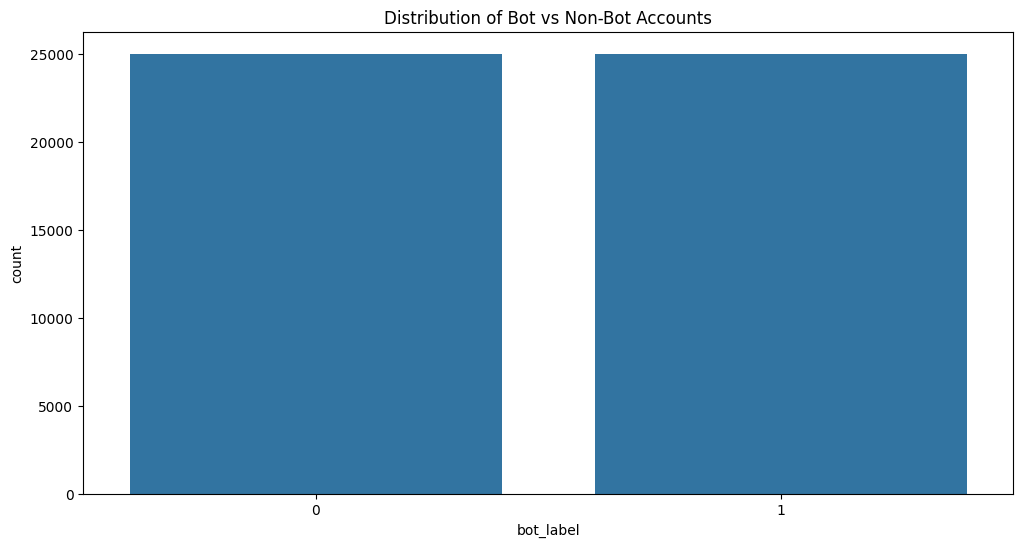

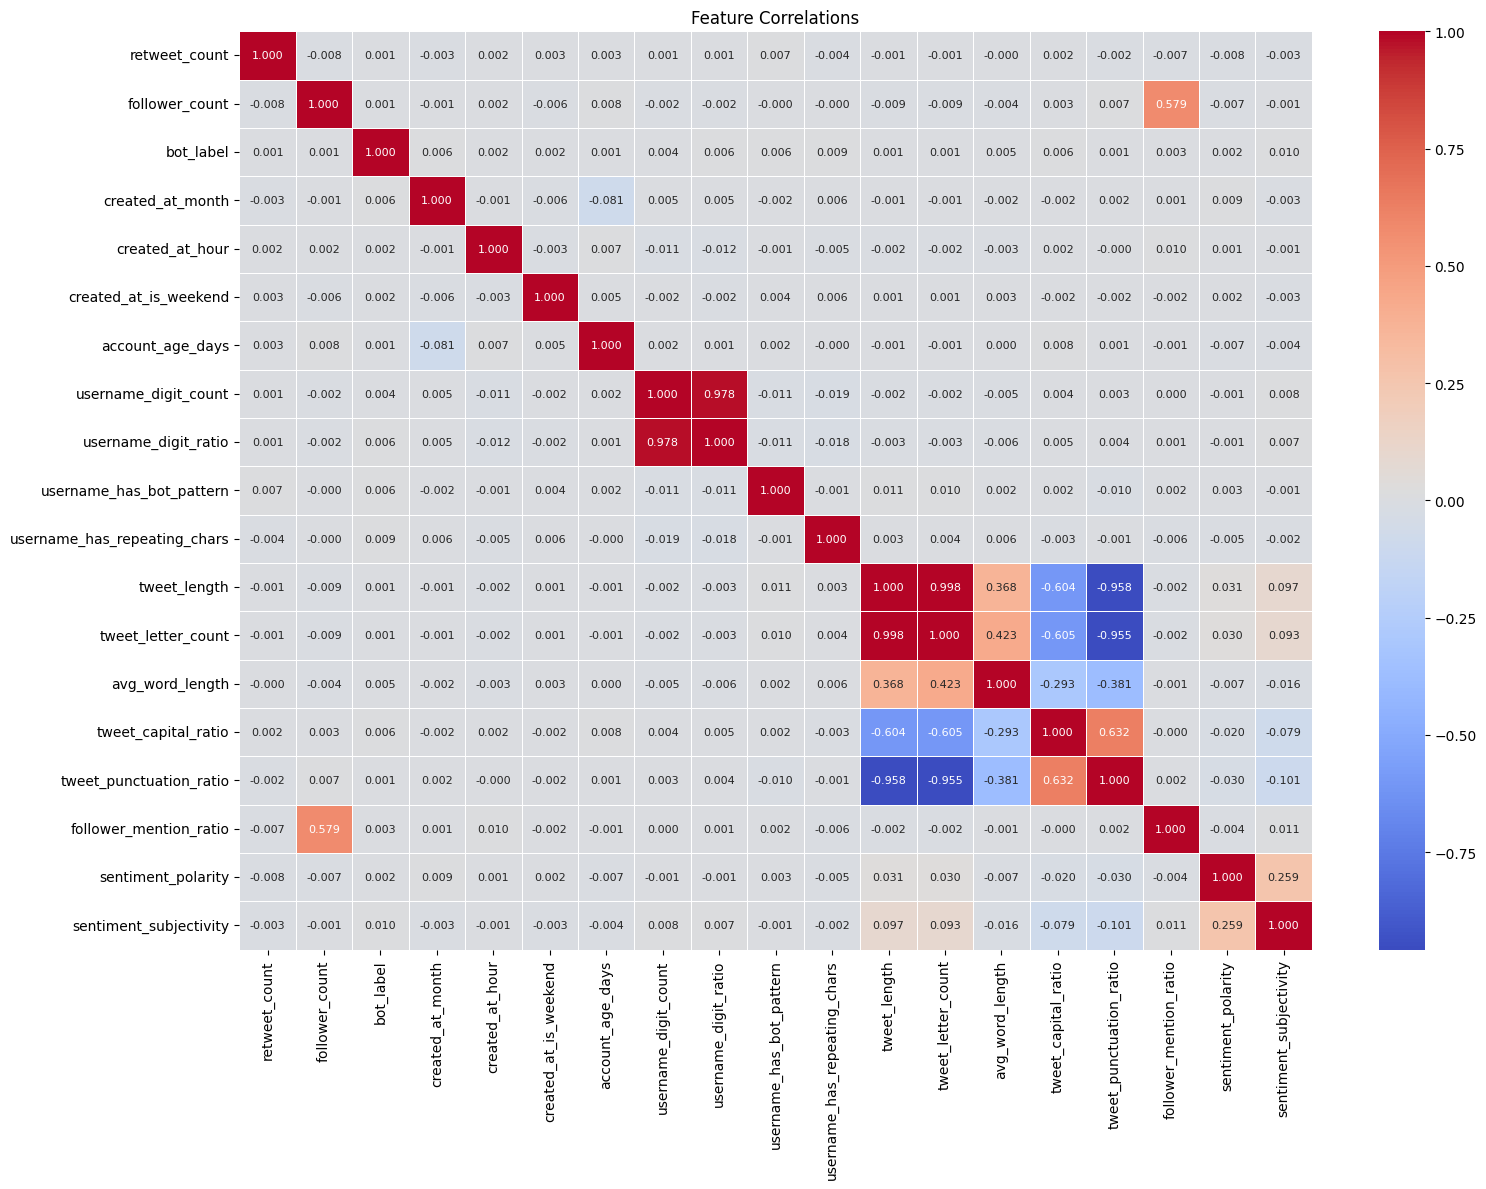

In [14]:
# Add visualizations
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='bot_label')
plt.title('Distribution of Bot vs Non-Bot Accounts')
plt.show()

# Correlation heatmap
plt.figure(figsize=(16,12))
sns.heatmap(
    df.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".3f", 
    linewidths=0.5, 
    annot_kws={"size": 8}
)
plt.title('Feature Correlations')
plt.tight_layout() 
plt.show()

In [15]:
df = df.drop(columns=['username_digit_count', 'tweet_letter_count'])

In [16]:
df.corr()['bot_label'].sort_values(ascending=False)

bot_label                       1.000000
sentiment_subjectivity          0.009542
username_has_repeating_chars    0.009375
username_has_bot_pattern        0.006312
created_at_month                0.006148
tweet_capital_ratio             0.005913
username_digit_ratio            0.005877
avg_word_length                 0.005365
follower_mention_ratio          0.002798
sentiment_polarity              0.002384
created_at_hour                 0.002227
created_at_is_weekend           0.001827
tweet_punctuation_ratio         0.001265
retweet_count                   0.001250
follower_count                  0.001162
account_age_days                0.000991
tweet_length                    0.000894
Name: bot_label, dtype: float64

In [17]:
df = df.drop(columns=['follower_mention_ratio', 'sentiment_polarity', 'created_at_hour', 'created_at_is_weekend', 'tweet_punctuation_ratio', 'retweet_count', 'follower_count', 'account_age_days', 'tweet_length'])

In [18]:
df.describe()

,bot_label,created_at_month,username_digit_ratio,username_has_bot_pattern,username_has_repeating_chars,avg_word_length,tweet_capital_ratio,sentiment_subjectivity
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.500360,6.073360,6.534027,0.00036,0.001020,6.543732,0.018826,0.360060
std,0.500005,3.465744,11.469729,0.01897,0.031921,0.679283,0.008063,0.270404
min,0.000000,1.000000,0.000000,0.00000,0.000000,3.833333,0.008475,0.000000
25%,0.000000,3.000000,0.000000,0.00000,0.000000,6.090909,0.013514,0.112500
50%,1.000000,6.000000,0.000000,0.00000,0.000000,6.500000,0.016667,0.366667
75%,1.000000,9.000000,16.666667,0.00000,0.000000,7.000000,0.021739,0.525000
max,1.000000,12.000000,50.000000,1.00000,1.000000,10.000000,0.147059,1.000000


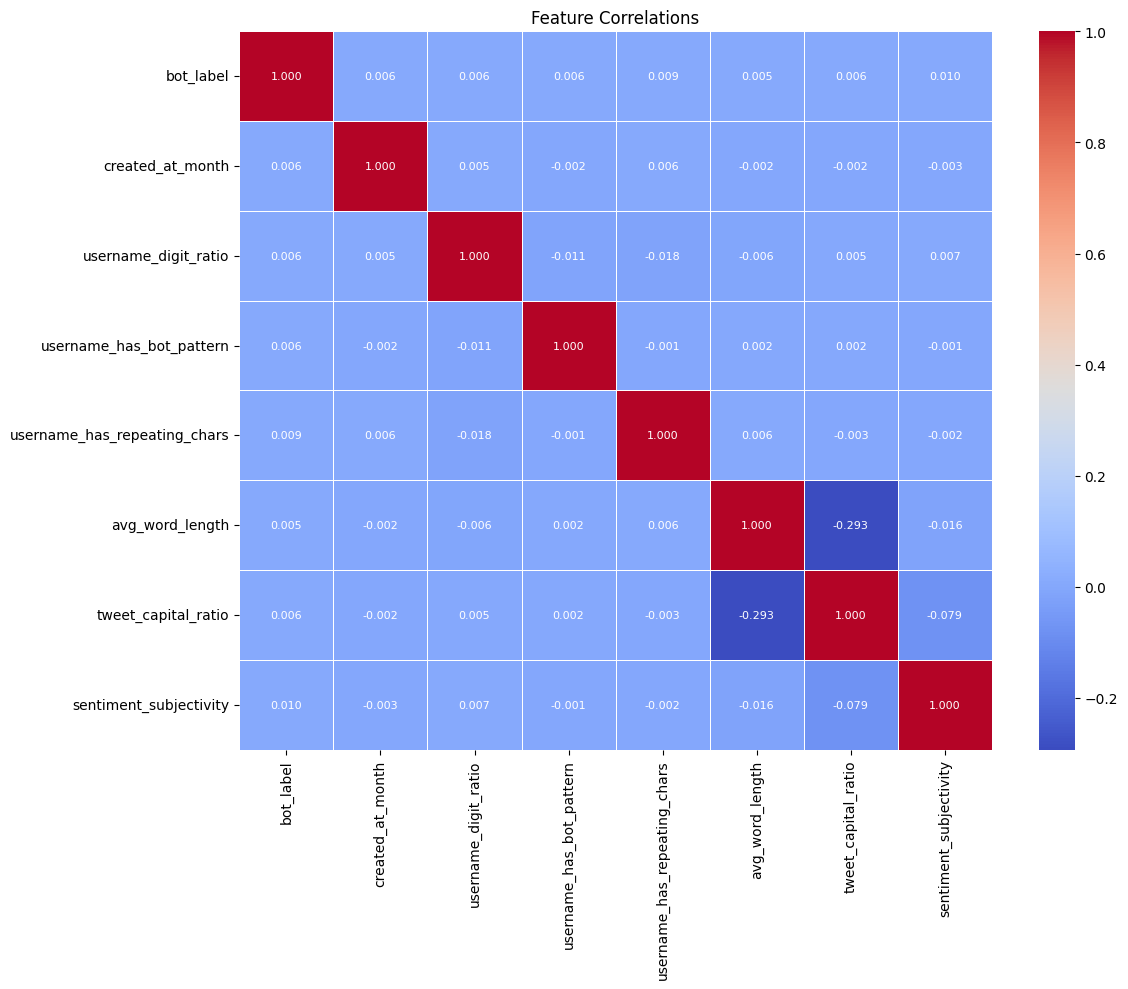

In [19]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(
    df.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".3f", 
    linewidths=0.5, 
    annot_kws={"size": 8}
)
plt.title('Feature Correlations')
plt.tight_layout() 
plt.show()

In [20]:
X = df.drop(columns=['bot_label'])
y = df['bot_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# print the split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (40000, 7)
X_test shape: (10000, 7)
y_train shape: (40000,)
y_test shape: (10000,)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Define models
models = {
    'LogisticRegression': LogisticRegression(class_weight="balanced", solver="liblinear", random_state=42),
    'RBF_SVC': SVC(kernel='rbf', random_state=42),
    'LinearSVC': LinearSVC(random_state=42)
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred)
    }

# Print results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print()

Model: LogisticRegression
accuracy: 0.5029
precision: 0.5065
recall: 0.4692
roc_auc: 0.5031

Model: RBF_SVC
accuracy: 0.5012
precision: 0.5050
recall: 0.4386
roc_auc: 0.5016

Model: LinearSVC
accuracy: 0.5024
precision: 0.5063
recall: 0.4505
roc_auc: 0.5027



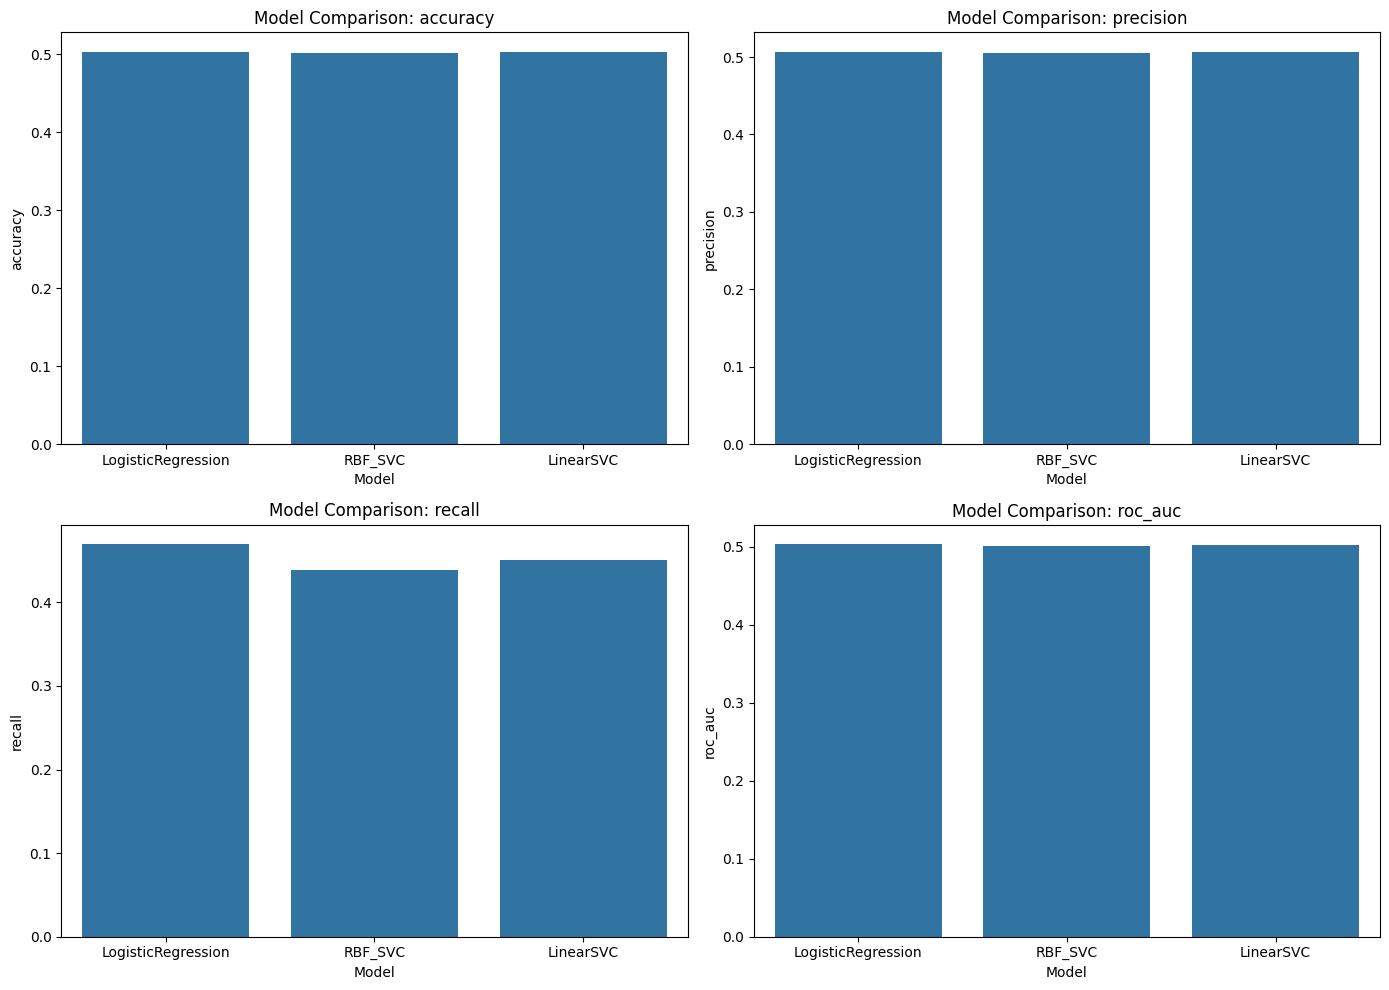

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T

# Plot the results
metrics = ['accuracy', 'precision', 'recall', 'roc_auc']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    sns.barplot(x=results_df.index, y=results_df[metric], ax=ax)
    ax.set_title(f'Model Comparison: {metric}')
    ax.set_ylabel(metric)
    ax.set_xlabel('Model')

plt.tight_layout()
plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(class_weight="balanced", solver="liblinear", random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.5029
Precision: 0.5065436601587642
Recall: 0.4691971383147854
ROC AUC: 0.5031170876759111


AUC: 0.5080450895268671


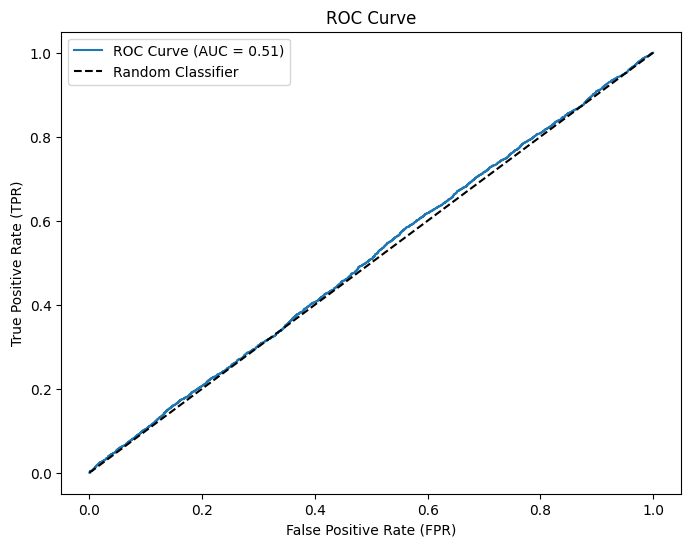

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class (bot = 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute AUC
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC:", auc_score)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()